# Project ML version 2 


In [129]:
import pandas as pd
appointment=pd.read_csv("KaggleV2-May-2016.csv")

In [130]:
appointment.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [131]:
appointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [132]:
appointment.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### gestion of dates and types in general 

In [133]:
import numpy as np 


appointment.AppointmentDay = appointment.AppointmentDay.apply(np.datetime64)
appointment.ScheduledDay = appointment.ScheduledDay.apply(np.datetime64)
#appointment.AwaitingTime = appointment.AwaitingTime.apply(abs)

In [134]:
appointment.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [135]:
appointment['Gender'] = appointment['Gender'].astype('category')
appointment['Neighbourhood'] = appointment['Neighbourhood'].astype('category')

appointment['No-show'] = appointment['No-show'].map({'Yes': '1', 'No': '0'})
#appointment['No-show'] = appointment['No-show'].astype('bool')


appointment['Scholarship'] = appointment['Scholarship'].astype('bool')


appointment['Hipertension'] = appointment['Hipertension'].astype('bool')


appointment['Diabetes'] = appointment['Diabetes'].astype('bool')


appointment['Alcoholism'] = appointment['Alcoholism'].astype('bool')


appointment['Alcoholism'] = appointment['Alcoholism'].astype('bool')


appointment['Handcap'] = appointment['Handcap'].astype('bool')


appointment['SMS_received'] = appointment['SMS_received'].astype('bool')

appointment['AppointmentID'] = appointment['AppointmentID'].astype('category')

In [136]:
appointment.dtypes

PatientId                float64
AppointmentID           category
Gender                  category
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood           category
Scholarship                 bool
Hipertension                bool
Diabetes                    bool
Alcoholism                  bool
Handcap                     bool
SMS_received                bool
No-show                   object
dtype: object

In [137]:
appointment.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,0
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,0
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,1
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,False,False,False,False,False,False,0
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,0


creation of a variable for the difference between the scheduleDay and the Appointement day

In [138]:
appointment['differenceDay']=appointment['AppointmentDay']-appointment['ScheduledDay']
# put in hours differences
appointment['differenceDay'] = appointment['differenceDay'].apply(lambda x: x.total_seconds()/3600)
# abs value  
appointment['differenceDay']=abs(appointment['differenceDay'])

In [139]:
# abs value  
appointment['differenceDay']=abs(appointment['differenceDay'])

In [140]:
appointment.dtypes

PatientId                float64
AppointmentID           category
Gender                  category
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood           category
Scholarship                 bool
Hipertension                bool
Diabetes                    bool
Alcoholism                  bool
Handcap                     bool
SMS_received                bool
No-show                   object
differenceDay            float64
dtype: object

### split into train and test 

In [141]:
X=appointment.loc[:, appointment.columns != 'No-show']
y=appointment['No-show']

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=11)

In [142]:
X_train.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,differenceDay
65804,4.684362e+14,5667828,F,2016-05-06 08:09:54,2016-05-06,1,JARDIM CAMBURI,False,False,False,False,False,False,8.165000
38855,7.222263e+11,5543382,F,2016-04-05 10:05:09,2016-05-04,49,DO CABRAL,False,False,False,True,False,True,685.914167
8434,2.688613e+13,5738866,M,2016-05-25 11:48:03,2016-05-25,63,SANTA MARTHA,False,False,False,True,False,False,11.800833
8837,8.121397e+13,5723661,M,2016-05-20 08:28:57,2016-05-20,48,MÁRIO CYPRESTE,False,False,False,False,False,False,8.482500
60571,2.224798e+12,5617054,M,2016-04-25 15:19:10,2016-05-11,45,PRAIA DO CANTO,False,True,False,False,False,True,368.680556


### Creation of a balance Xtrain, Y train from bootsraping for prediction 


In [143]:
X2= X_train
X2["No-show"]=y_train

/Users/victor/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [144]:
X2.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,differenceDay,No-show
65804,4.684362e+14,5667828,F,2016-05-06 08:09:54,2016-05-06,1,JARDIM CAMBURI,False,False,False,False,False,False,8.165000,0
38855,7.222263e+11,5543382,F,2016-04-05 10:05:09,2016-05-04,49,DO CABRAL,False,False,False,True,False,True,685.914167,0
8434,2.688613e+13,5738866,M,2016-05-25 11:48:03,2016-05-25,63,SANTA MARTHA,False,False,False,True,False,False,11.800833,0
8837,8.121397e+13,5723661,M,2016-05-20 08:28:57,2016-05-20,48,MÁRIO CYPRESTE,False,False,False,False,False,False,8.482500,0
60571,2.224798e+12,5617054,M,2016-04-25 15:19:10,2016-05-11,45,PRAIA DO CANTO,False,True,False,False,False,True,368.680556,0


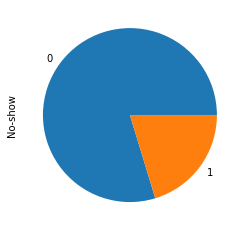

In [145]:
import matplotlib as plt
X2['No-show'].value_counts().plot(kind='pie')

In [146]:
# Class count
X2['No-show'].value_counts()

0    70480
1    17941
Name: No-show, dtype: int64

 We would like to do a balanced data of 30 000 of each class using bootstrap 

In [159]:

# Divide by class
X2_0 = X2[X2['No-show'] == '0']
X2_1 = X2[X2['No-show'] == '1']

In [161]:
# Bootstrap
X2_0_boot = X2_0.sample(n=30000, replace=True)
X2_1_boot = X2_1.sample(n=30000, replace=True)
X2_boot = pd.concat([X2_0_boot, X2_1_boot], axis=0)

In [162]:
X2_boot['No-show'].value_counts()

0    30000
1    30000
Name: No-show, dtype: int64

In [163]:
X2_boot.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,differenceDay,No-show
98951,8.992144e+13,5759642,F,2016-06-01 13:26:31,2016-06-01,33,ANDORINHAS,False,False,False,False,False,False,13.441944,0
104238,2.851283e+12,5768631,F,2016-06-03 07:49:57,2016-06-03,27,GURIGICA,True,False,False,False,False,False,7.832500,0
32448,1.362198e+10,5639622,F,2016-04-29 09:18:57,2016-05-13,27,SOLON BORGES,False,False,False,False,False,False,326.684167,0
95686,3.341998e+13,5761607,M,2016-06-02 06:40:43,2016-06-06,48,NOVA PALESTINA,False,True,True,True,False,True,89.321389,0
45055,1.281655e+13,5639994,M,2016-04-29 09:57:18,2016-05-25,62,SANTO ANTÔNIO,False,True,False,False,False,False,614.045000,0


In [ ]:
# we just gonna change the order 
